<a href="https://colab.research.google.com/github/ulrikSebastienR/Colab-python-diaries/blob/master/bb_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
#https://ostwalprasad.github.io/machine-learning/PCA-using-python.html
#https://www.kaggle.com/agnihotri/linear-regression-and-pca-boston-housing
import pandas as pd
from sklearn import datasets, decomposition
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
boston_ds = datasets.load_boston()
print(dir(boston_ds))

['DESCR', 'data', 'feature_names', 'filename', 'target']


In [25]:
boston = pd.DataFrame(boston_ds.data)
print(boston)
print(boston_ds.feature_names)

          0     1      2    3      4   ...   8      9     10      11    12
0    0.00632  18.0   2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1    0.02731   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2    0.02729   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3    0.03237   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4    0.06905   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33
..       ...   ...    ...  ...    ...  ...  ...    ...   ...     ...   ...
501  0.06263   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  391.99  9.67
502  0.04527   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  9.08
503  0.06076   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  5.64
504  0.10959   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  393.45  6.48
505  0.04741   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  7.88

[506 rows x 13 columns]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 '

In [26]:
boston = pd.DataFrame(boston_ds.data, columns=[boston_ds.feature_names],)
print(boston)

        CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX PTRATIO       B LSTAT
0    0.00632  18.0   2.31  0.0  0.538  ...  1.0  296.0    15.3  396.90  4.98
1    0.02731   0.0   7.07  0.0  0.469  ...  2.0  242.0    17.8  396.90  9.14
2    0.02729   0.0   7.07  0.0  0.469  ...  2.0  242.0    17.8  392.83  4.03
3    0.03237   0.0   2.18  0.0  0.458  ...  3.0  222.0    18.7  394.63  2.94
4    0.06905   0.0   2.18  0.0  0.458  ...  3.0  222.0    18.7  396.90  5.33
..       ...   ...    ...  ...    ...  ...  ...    ...     ...     ...   ...
501  0.06263   0.0  11.93  0.0  0.573  ...  1.0  273.0    21.0  391.99  9.67
502  0.04527   0.0  11.93  0.0  0.573  ...  1.0  273.0    21.0  396.90  9.08
503  0.06076   0.0  11.93  0.0  0.573  ...  1.0  273.0    21.0  396.90  5.64
504  0.10959   0.0  11.93  0.0  0.573  ...  1.0  273.0    21.0  393.45  6.48
505  0.04741   0.0  11.93  0.0  0.573  ...  1.0  273.0    21.0  396.90  7.88

[506 rows x 13 columns]


In [27]:
boston['MEDV'] = boston_ds.target
print(boston)

        CRIM    ZN  INDUS CHAS    NOX  ...    TAX PTRATIO       B LSTAT  MEDV
0    0.00632  18.0   2.31  0.0  0.538  ...  296.0    15.3  396.90  4.98  24.0
1    0.02731   0.0   7.07  0.0  0.469  ...  242.0    17.8  396.90  9.14  21.6
2    0.02729   0.0   7.07  0.0  0.469  ...  242.0    17.8  392.83  4.03  34.7
3    0.03237   0.0   2.18  0.0  0.458  ...  222.0    18.7  394.63  2.94  33.4
4    0.06905   0.0   2.18  0.0  0.458  ...  222.0    18.7  396.90  5.33  36.2
..       ...   ...    ...  ...    ...  ...    ...     ...     ...   ...   ...
501  0.06263   0.0  11.93  0.0  0.573  ...  273.0    21.0  391.99  9.67  22.4
502  0.04527   0.0  11.93  0.0  0.573  ...  273.0    21.0  396.90  9.08  20.6
503  0.06076   0.0  11.93  0.0  0.573  ...  273.0    21.0  396.90  5.64  23.9
504  0.10959   0.0  11.93  0.0  0.573  ...  273.0    21.0  393.45  6.48  22.0
505  0.04741   0.0  11.93  0.0  0.573  ...  273.0    21.0  396.90  7.88  11.9

[506 rows x 14 columns]


In [28]:
print(boston.isna())

      CRIM     ZN  INDUS   CHAS    NOX  ...    TAX PTRATIO      B  LSTAT   MEDV
0    False  False  False  False  False  ...  False   False  False  False  False
1    False  False  False  False  False  ...  False   False  False  False  False
2    False  False  False  False  False  ...  False   False  False  False  False
3    False  False  False  False  False  ...  False   False  False  False  False
4    False  False  False  False  False  ...  False   False  False  False  False
..     ...    ...    ...    ...    ...  ...    ...     ...    ...    ...    ...
501  False  False  False  False  False  ...  False   False  False  False  False
502  False  False  False  False  False  ...  False   False  False  False  False
503  False  False  False  False  False  ...  False   False  False  False  False
504  False  False  False  False  False  ...  False   False  False  False  False
505  False  False  False  False  False  ...  False   False  False  False  False

[506 rows x 14 columns]


In [29]:
print(boston.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [30]:
np.random.seed(0)
print(np.random.rand(4))
print(np.random.rand(4))

[0.5488135  0.71518937 0.60276338 0.54488318]
[0.4236548  0.64589411 0.43758721 0.891773  ]


In [31]:
np.random.seed(0)
print(np.random.rand(4))
np.random.seed(0)
print(np.random.rand(4)) 
#https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do

[0.5488135  0.71518937 0.60276338 0.54488318]
[0.5488135  0.71518937 0.60276338 0.54488318]


In [32]:
x = np.random.rand(100)
print(x)

[0.4236548  0.64589411 0.43758721 0.891773   0.96366276 0.38344152
 0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
 0.0202184  0.83261985 0.77815675 0.87001215 0.97861834 0.79915856
 0.46147936 0.78052918 0.11827443 0.63992102 0.14335329 0.94466892
 0.52184832 0.41466194 0.26455561 0.77423369 0.45615033 0.56843395
 0.0187898  0.6176355  0.61209572 0.616934   0.94374808 0.6818203
 0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
 0.21038256 0.1289263  0.31542835 0.36371077 0.57019677 0.43860151
 0.98837384 0.10204481 0.20887676 0.16130952 0.65310833 0.2532916
 0.46631077 0.24442559 0.15896958 0.11037514 0.65632959 0.13818295
 0.19658236 0.36872517 0.82099323 0.09710128 0.83794491 0.09609841
 0.97645947 0.4686512  0.97676109 0.60484552 0.73926358 0.03918779
 0.28280696 0.12019656 0.2961402  0.11872772 0.31798318 0.41426299
 0.0641475  0.69247212 0.56660145 0.26538949 0.52324805 0.09394051
 0.5759465  0.9292962  0.31856895 0.66741038 0.13179786 0.7163272

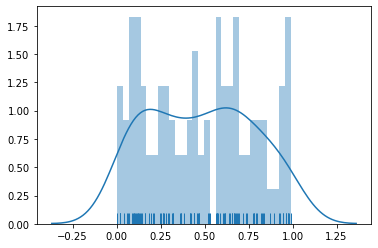

In [33]:
ax = sns.distplot(x, bins=30, rug=True)
plt.show()
#https://seaborn.pydata.org/generated/seaborn.distplot.html

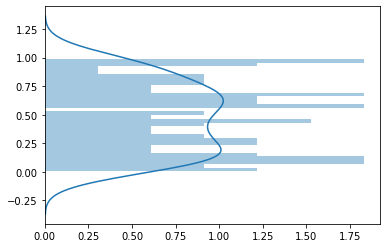

In [34]:
ax = sns.distplot(x, bins = 30, vertical=True)
plt.show()

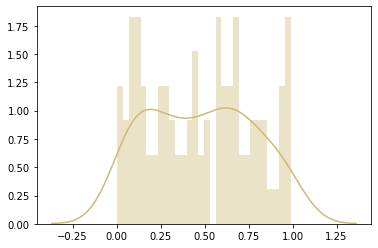

In [36]:
sns.set_color_codes()
ax = sns.distplot(x, bins=30, color='y' )
plt.show()

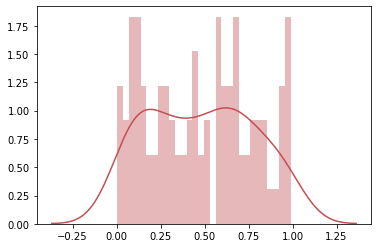

In [38]:
ax = sns.distplot(x,bins=30, color='r')
plt.show()

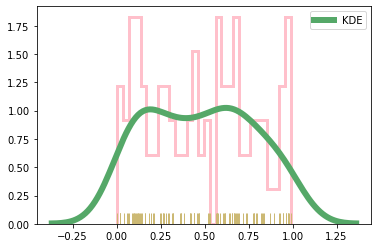

In [41]:
ax = sns.distplot(x, bins=30, rug=True, rug_kws={'color':'y'}, kde_kws={'color':'g','lw':6, 'label':'KDE'}, hist_kws={'histtype':'step','linewidth':3,'alpha':1,'color':'pink'})
plt.show()